# Google Play Store Data Cleaning and Exploratory Analysis 

In [1]:
# Importing libraries and loading data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("googleplaystore_v2.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## Data Cleaning

In [2]:
# Checking Null values by column

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [3]:
# Removing Null values of Rating column

data = data[~(data.Rating.isnull())]

In [4]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [5]:
# Checking Null values for Android Ver Column

data[data["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [6]:
data = data[~(data["Android Ver"].isnull() & (data.Category == "1.9"))]

In [7]:
data[data["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN


In [8]:
data["Android Ver"].mode()[0]

'4.1 and up'

In [9]:
# Replacing Null values of Android Ver Column with thhe most common value of the same column

data["Android Ver"] = data["Android Ver"].fillna(data["Android Ver"].mode()[0])

In [10]:
# No Null value anymore in this column

data[data["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [11]:
# Checking for more Null values

data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [12]:
data["Current Ver"].mode()[0]

'Varies with device'

In [13]:
# Replacing the Current Ver column with the most common values of the same column

data["Current Ver"] = data["Current Ver"].fillna(data["Current Ver"].mode()[0])

In [14]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Changing the Data Type

In [15]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [16]:
# Checking the data type pf Reviews Column

data.Reviews.dtypes

dtype('O')

In [17]:
# Reviews column has integers to its data type should be integer not object type. 

data.Reviews.value_counts()

2          83
3          78
5          74
4          74
1          67
           ..
1267        1
8118880     1
66791       1
7728        1
9659        1
Name: Reviews, Length: 5992, dtype: int64

In [18]:
# Changing its data type

data.Reviews = data.Reviews.astype("int32")

In [19]:
data.Reviews.dtypes

dtype('int32')

In [20]:
# Checking data type for Installs column

data.Installs.dtypes

dtype('O')

In [21]:
# Installs data type should be integer so changing it into integer

def cleanup(value):
    return (value.replace(",", "").replace("+", ""))

In [22]:
data.Installs = data.Installs.apply(cleanup)

In [23]:
data.Installs = data.Installs.astype("int64")

In [24]:
data.Installs.dtypes

dtype('int64')

In [25]:
# Checking the data type of Price Column

data.Price.dtypes

dtype('O')

In [26]:
# The data type of Price should be float not object so changin it.

data.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$379.99       1
$1.59         1
$15.46        1
$1.61         1
$19.40        1
Name: Price, Length: 73, dtype: int64

In [27]:
data.Price = data.Price.apply(lambda x : 0 if x == "0" else float(x[1:]))

In [28]:
data.Price.dtypes

dtype('float64')

## Sanity Check

In [29]:
# Number of Reviews should be less than equal to Installs
# so I excluded the rows which has Reviews more than Installs.

data = data[data.Reviews <= data.Installs]

In [30]:
# Checking if Type is free then Price should be 0.

data[(data.Type == "Free") & (data.Price > 0)].shape

(0, 13)

## Handling Outliers

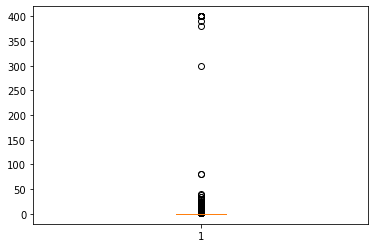

In [31]:
plt.boxplot(data.Price)
plt.show()

In [32]:
# Removing the outliers because its suspicious to have the google play store app prices more than 100 or 200. 
data = data[data.Price < 200]

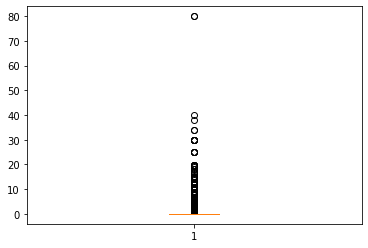

In [33]:
plt.boxplot(data.Price)
plt.show()

## Exploratory Analysis and Visualization

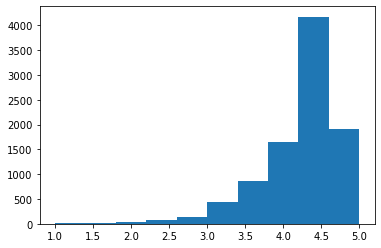

In [34]:
plt.hist(data.Rating)
plt.show()

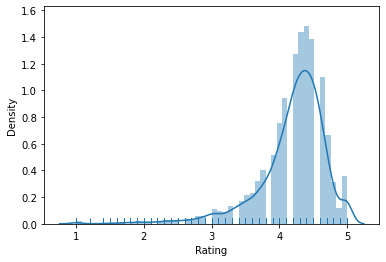

In [35]:
# Probability distribution curve

import warnings
warnings.filterwarnings("ignore")

sns.distplot(data.Rating, rug = True, kde = True)
plt.show()

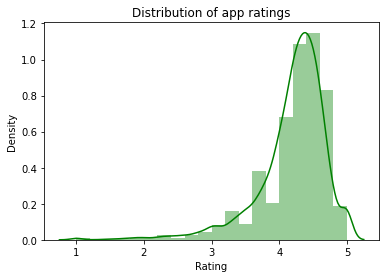

In [36]:
sns.distplot(data.Rating, bins = 20, color = "g")
plt.title("Distribution of app ratings", fontsize = 12)

plt.show()

In [37]:
# Checking on Content Rating Column.

data["Content Rating"].value_counts()

Everyone           7400
Teen               1082
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [38]:
# Dropping records for adults only 18+ and unrated

data = data[~data["Content Rating"].isin(["Adults only 18+", "Unrated"])]

In [39]:
data.shape

(9340, 13)

In [40]:
# Resetting index

data.reset_index(inplace = True, drop = True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9340 entries, 0 to 9339
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9340 non-null   object 
 1   Category        9340 non-null   object 
 2   Rating          9340 non-null   float64
 3   Reviews         9340 non-null   int32  
 4   Size            9340 non-null   float64
 5   Installs        9340 non-null   int64  
 6   Type            9340 non-null   object 
 7   Price           9340 non-null   float64
 8   Content Rating  9340 non-null   object 
 9   Genres          9340 non-null   object 
 10  Last Updated    9340 non-null   object 
 11  Current Ver     9340 non-null   object 
 12  Android Ver     9340 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 912.2+ KB


In [42]:
data["Content Rating"].value_counts()

Everyone        7400
Teen            1082
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

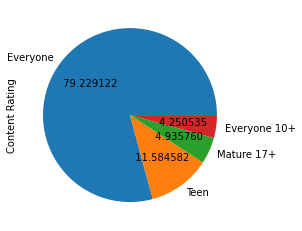

In [43]:
data["Content Rating"].value_counts().plot.pie(autopct = "% 2f")
plt.show()

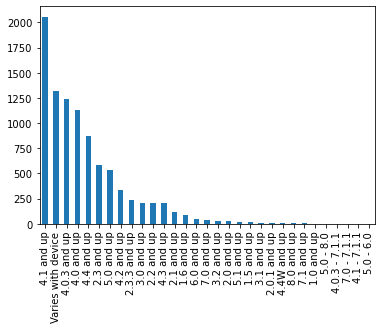

In [44]:
# Android Ver column

data["Android Ver"].value_counts().plot.bar()
plt.show()

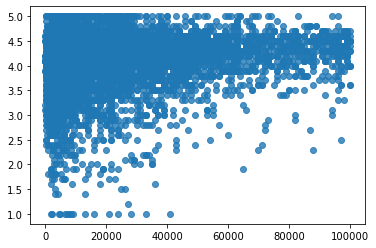

In [45]:
# Size vs rating

plt.scatter(data.Size, data.Rating, alpha = 0.8)
plt.show()

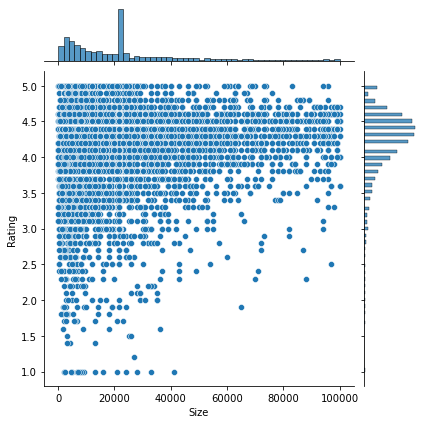

In [46]:
# making in seaborn (Size vs Rating )
sns.jointplot(data.Size, data.Rating)
plt.show()

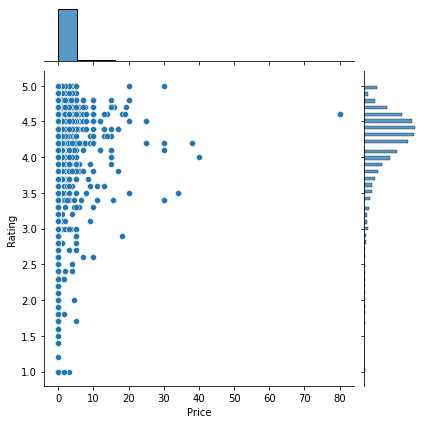

In [47]:
# Price vs rating

sns.jointplot(data.Price, data.Rating)
plt.show()

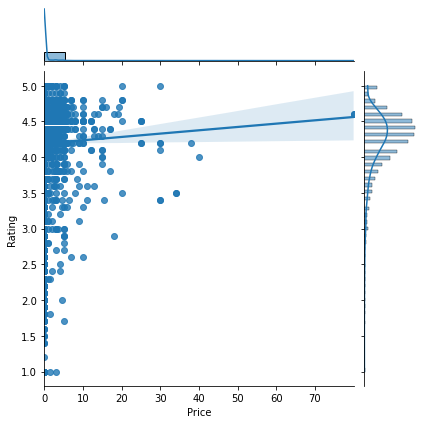

In [48]:
sns.jointplot(data.Price, data.Rating, kind = "reg")
plt.show()

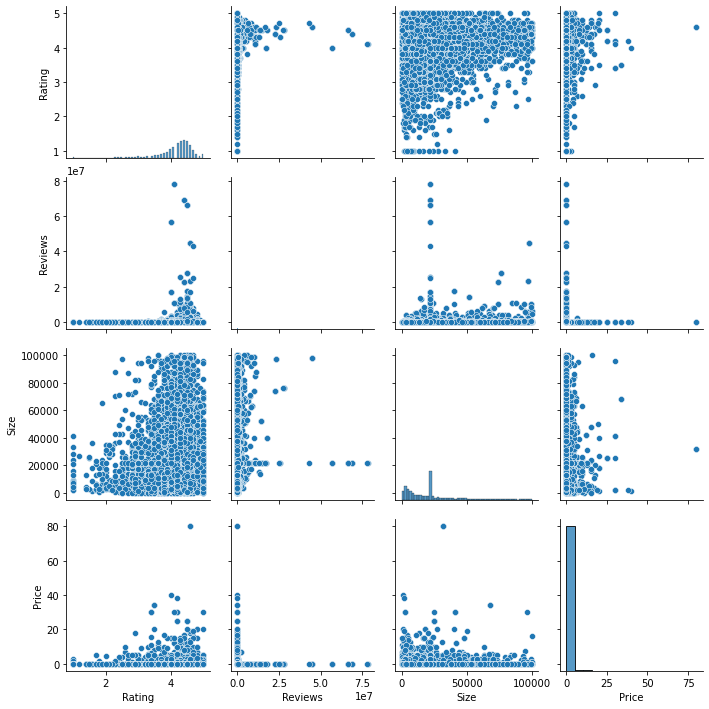

In [49]:
# Looking at all numeric columns together

sns.pairplot(data[["Rating", "Reviews", "Size", "Price"]])
plt.show()

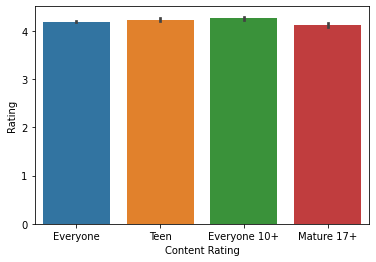

In [50]:
# Content Rating Vs Rating

sns.barplot(data = data, x = "Content Rating", y = "Rating")
plt.show()

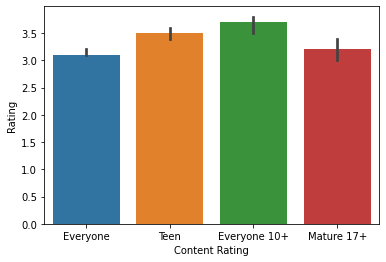

In [51]:
# Checking for 5 Percentile. 

sns.barplot(data = data, x = "Content Rating", y = "Rating", estimator = lambda x : np.quantile(x, 0.05))
plt.show()

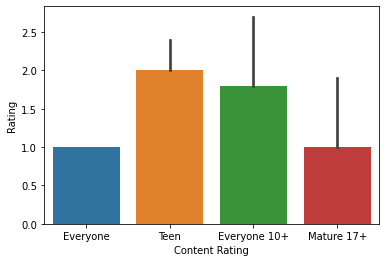

In [52]:
# Checinhg for minimum estimator

sns.barplot(data = data, x = "Content Rating", y = "Rating", estimator = min)
plt.show()

In [53]:
# Rating vs Size vs content Rating

# Content Rating itself has categories 
# so we will divide Size in different buckets depending on different sizes by using the pandas function qcut. 

In [54]:
data["Size_Buckets"] = pd.qcut(data.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL", "L", "M", "H", "VH"])

In [55]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,L
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,VL


In [56]:
pd.pivot_table(data = data, index = "Content Rating", columns = "Size_Buckets", values = "Rating")


Size_Buckets,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.114009,4.167953,4.254010,4.164900,4.220968
Everyone 10+,4.189474,4.251282,4.253153,4.226761,4.283439
Mature 17+,4.112281,4.057292,4.098592,4.174603,4.194175
Teen,4.199074,4.221893,4.207101,4.228462,4.276855


In [57]:
pd.pivot_table(data = data, index = "Content Rating", columns = "Size_Buckets", values = "Rating", aggfunc = np.median)


Size_Buckets,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.2,4.3,4.3,4.30,4.3
Everyone 10+,4.1,4.3,4.3,4.30,4.4
Mature 17+,4.3,4.2,4.2,4.20,4.2
Teen,4.3,4.3,4.3,4.25,4.3


In [58]:
# For 20 percentile

pd.pivot_table(data = data, index = "Content Rating", columns = "Size_Buckets", values = "Rating", aggfunc = lambda x : np.quantile(x, 0.2))
 

Size_Buckets,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.1,3.86,4.00
Everyone 10+,3.86,4.06,4.1,4.00,4.02
Mature 17+,3.42,3.60,4.0,3.90,4.00
Teen,3.80,3.90,4.0,4.00,4.00


In [59]:
result = pd.pivot_table(data = data, index = "Content Rating", columns = "Size_Buckets", values = "Rating", aggfunc = lambda x : np.quantile(x, 0.2))


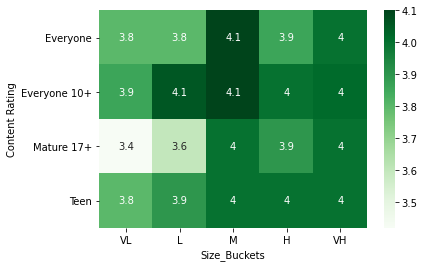

In [60]:
sns.heatmap(result, cmap = "Greens", annot = True)
plt.show()

In [61]:
# Analyze the ratings by month

data["Last Updated"].head()

0    07-Jan-18
1    15-Jan-18
2    01-Aug-18
3    08-Jun-18
4    20-Jun-18
Name: Last Updated, dtype: object

In [62]:
data["Updated Months"] = pd.to_datetime(data["Last Updated"]).dt.month

In [63]:
# This is the mean rating of each month
data.groupby(["Updated Months"])["Rating"].mean()

Updated Months
1     4.143735
2     4.094048
3     4.110989
4     4.154600
5     4.162410
6     4.185068
7     4.249823
8     4.292963
9     4.042636
10    4.016460
11    4.112338
12    4.071726
Name: Rating, dtype: float64

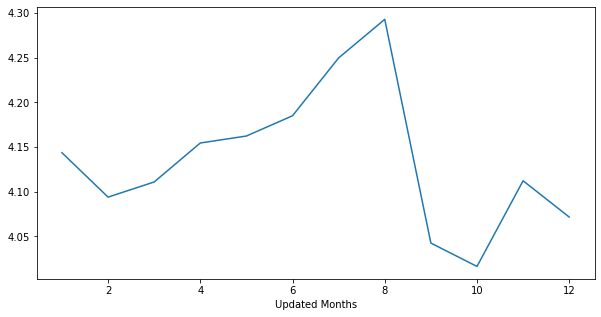

In [64]:
plt.figure(figsize = [10, 5])
data.groupby(["Updated Months"])["Rating"].mean().plot()
plt.show()

In [65]:
# Makings stack plot to see the difference in the app installs by month

pd.pivot_table(data= data, values = "Installs", index = "Updated Months", columns = "Content Rating", aggfunc = sum) 

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated Months,,,,
1,1025387390,105282000,9701210,44159010
2,945372005,19821000,13021500,39597710
3,1045365520,30322510,9111100,99850310
4,2593371280,23300000,5259000,271619410
5,5431067800,128173500,110140100,562689600
6,6157172505,1367727100,155257200,505716600
7,46991110680,9726556000,1739491910,15983556800
8,46490943320,1715821000,3462981700,16997855650
9,410340410,24931100,2201010,22483100


In [66]:
monthly = pd.pivot_table(data= data, values = "Installs", index = "Updated Months", columns = "Content Rating", aggfunc = sum) 

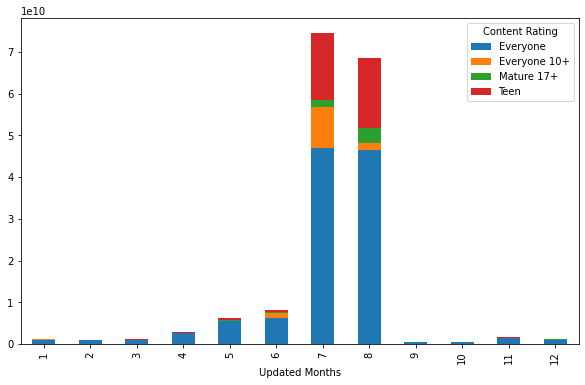

In [67]:
monthly.plot(kind = "bar", stacked = "True", figsize = [10,6])
plt.show()

In [68]:
# Get percentages/proportions instead of absolute values

In [69]:
monthly[["Everyone", "Everyone 10+", "Mature 17+", "Teen"]].apply(lambda x : x/x.sum(), axis = 1)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated Months,,,,
1,0.865649,0.088881,0.008190,0.037280
2,0.928828,0.019474,0.012794,0.038905
3,0.882426,0.025596,0.007691,0.084287
4,0.896259,0.008052,0.001817,0.093871
5,0.871471,0.020567,0.017673,0.090289
6,0.752171,0.167084,0.018966,0.061779
7,0.631255,0.130662,0.023367,0.214715
8,0.677043,0.024987,0.050431,0.247538
9,0.892130,0.054203,0.004785,0.048881


In [70]:
monthly_percentage = monthly[["Everyone", "Everyone 10+", "Mature 17+", "Teen"]].apply(lambda x : x/x.sum(), axis = 1)

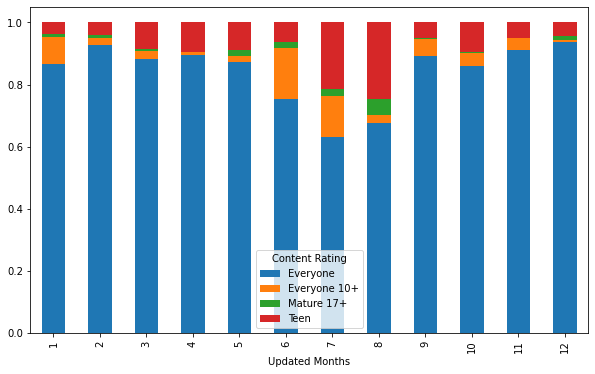

In [71]:
monthly_percentage.plot(kind = "bar", stacked = "True", figsize = [10,6])
plt.show()

## Summary
 

1) Users are not showing much interest in giving rating those apps which are expensive, instead they are giving rating to those apps which are either free or cheaper in price. 

2) Higher ratings are given to the Medium sized apps, which means people might be less interested in large size apps and small size apps. 

3) More apps are installed in June, July, and August, the reason could be the summer break to the school going students and they may use more mobile apps in their vaccation time.